In [ ]:
!pip install cuqipy

In [ ]:
import cuqi
import numpy as np
import matplotlib.pyplot as plt
from math import floor


Warmup: 100%|██████████| 30000/30000 [00:43<00:00, 689.09it/s]


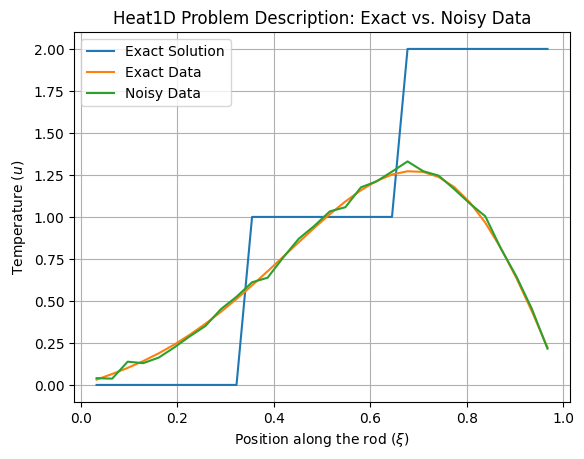

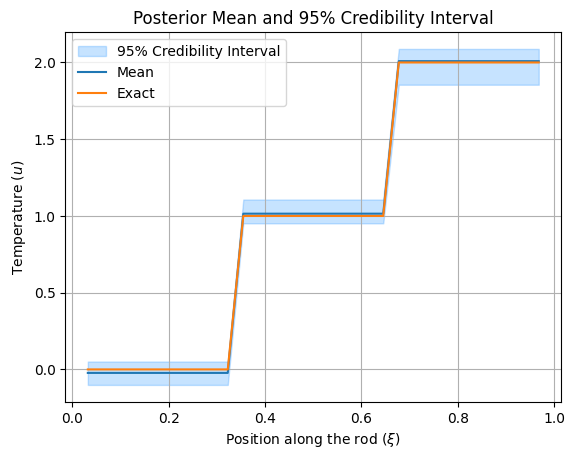

Posterior samples shape: (3, 30000)


In [ ]:
from cuqi.testproblem import Heat1D
from cuqi.distribution import Gaussian, JointDistribution
from cuqi.experimental.mcmc import MH
import numpy as np
import matplotlib.pyplot as plt
from math import floor

# Problem setup
N = 30  # Number of finite difference nodes
L = 1  # Length of the domain
tau_max = 0.02  # Final time

# Define exact solution as a step function
n_steps = 3  # Number of steps in the step function
n_steps_values = [0, 1, 2]
myExactSolution = np.zeros(N)

start_idx = 0
for i in range(n_steps):
    end_idx = floor((i + 1) * N / n_steps)
    myExactSolution[start_idx:end_idx] = n_steps_values[i]
    start_idx = end_idx

# Initialize the Heat1D test problem
model, data, problemInfo = Heat1D(
    dim=N,
    endpoint=L,
    max_time=tau_max,
    field_type="Step",
    field_params={"n_steps": n_steps},
    exactSolution=myExactSolution,
).get_components()

# Define the prior
mean = 0
std = 1.2
x = Gaussian(mean, std**2, geometry=model.domain_geometry)

# Define the data distribution
sigma_noise = np.std(problemInfo.exactData - data) * np.ones(model.range_dim)
y = Gaussian(mean=model(x), cov=sigma_noise**2, geometry=model.range_geometry)

# Joint distribution and posterior
joint = JointDistribution(y, x)
posterior = joint(y=data)

# Sampling from the posterior
MySampler = MH(posterior)
posterior_samples = MySampler.warmup(30000, tune_freq=0.01).get_samples()

# Plot: Problem description (exact solution, exact data, noisy data)
problemInfo.exactSolution.plot(label="Exact Solution")
problemInfo.exactData.plot(label="Exact Data")
data.plot(label="Noisy Data")
plt.xlabel("Position along the rod ($\\xi$)")
plt.ylabel("Temperature ($u$)")
plt.title("Heat1D Problem Description: Exact vs. Noisy Data")
plt.legend()
plt.grid()
plt.show()

# Plot: Posterior results
posterior_samples.plot_ci(95, exact=problemInfo.exactSolution)
plt.xlabel("Position along the rod ($\\xi$)")
plt.ylabel("Temperature ($u$)")
plt.title("Posterior Mean and 95% Credibility Interval")
plt.grid()
plt.show()

# Print posterior samples' shape (for reference)
print("Posterior samples shape:", posterior_samples.shape)


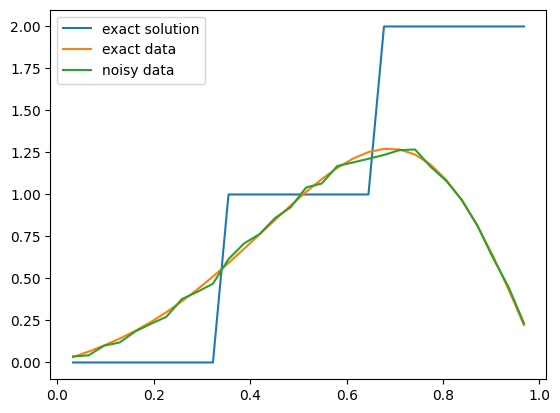

In [ ]:
# Ploting Problem description
problemInfo.exactSolution.plot()
problemInfo.exactData.plot()
data.plot()
plt.legend(['exact solution', 'exact data', 'noisy data']);